In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

In [2]:
microsoft_stocks_df_original = pd.read_csv('../data/microsoft_stocks.csv')
microsoft_stocks_df = microsoft_stocks_df_original.copy()
microsoft_stocks_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-01-12,47.540001,46.360001,47.419998,46.599998,23651900.0,40.786396
1,2015-01-13,47.910000,46.060001,46.970001,46.360001,35270600.0,40.576340
2,2015-01-14,46.240002,45.619999,45.959999,45.959999,29719600.0,40.226257
3,2015-01-15,46.380001,45.410000,46.220001,45.480000,32750800.0,39.806129
4,2015-01-16,46.279999,45.169998,45.310001,46.240002,35695300.0,40.471313


In [3]:
X = microsoft_stocks_df.drop(['Date','Close','Adj Close'],axis=1)
X['Moving Avg'] = X['Open'].rolling(window=3).mean()
y = microsoft_stocks_df['Close']
X = X.drop([0,1],axis=0)
y = y.drop([0,1],axis=0)
X

,High,Low,Open,Volume,Moving Avg
2,46.240002,45.619999,45.959999,29719600.0,46.783333
3,46.380001,45.410000,46.220001,32750800.0,46.383334
4,46.279999,45.169998,45.310001,35695300.0,45.830001
5,46.650002,45.570000,46.299999,36161900.0,45.943334
6,46.139999,45.480000,45.939999,39081100.0,45.850000
...,...,...,...,...,...
1920,280.339996,267.980011,279.079987,27549300.0,277.273326
1921,267.399994,263.850006,265.850006,20338500.0,274.086660
1922,267.049988,260.660004,266.670013,22767100.0,270.533335
1923,267.109985,261.329987,265.390015,24791800.0,265.970011


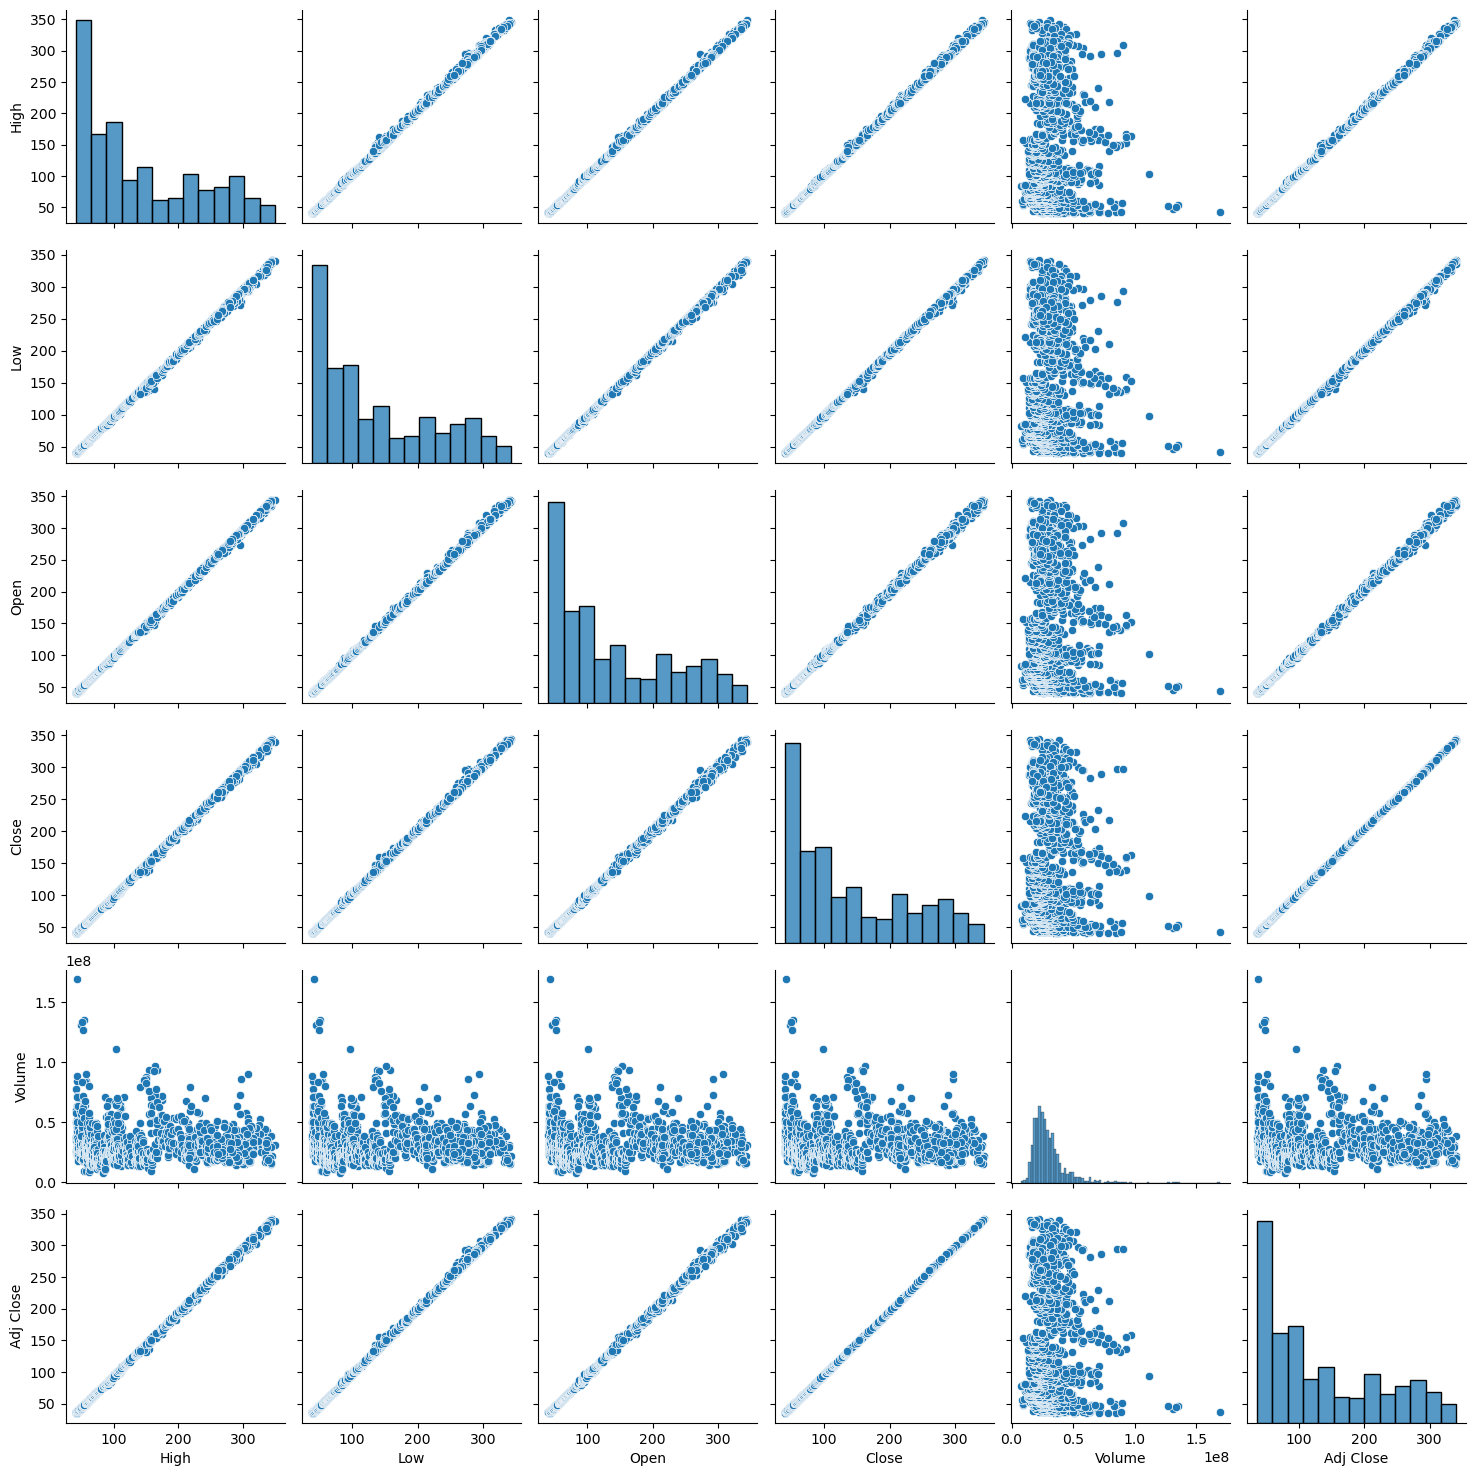

In [4]:
sns.pairplot(data=microsoft_stocks_df)
plt.show()

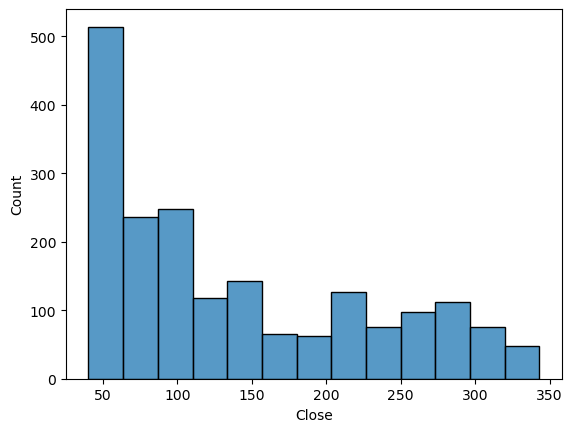

In [5]:
sns.histplot(y)
plt.show()

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

train_rmse_errors = []
test_rmse_errors = []
for degree in range(1,9):
    
    poly_converter = PolynomialFeatures(degree=degree,include_bias=False)
    poly_features = poly_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features,y,test_size=0.3,random_state=42)

    model = LinearRegression()
    model.fit(X_train,y_train)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    train_rmse_errors.append(mean_squared_error(y_train,train_predictions))
    test_rmse_errors.append(np.sqrt(mean_squared_error(y_test,test_predictions)))


[1. 2. 3. 4. 5. 6. 7. 8.]
[1.2357383101735098, 1.206723344229203, 295.71680066220466, 2791.447182464179, 5464.534992859249, 6245.130711487869, 7195.153357965468, 7574.337378792396]
[1.0669127363493536, 1.2388362035556508, 27.59030940140072, 99.32378087085644, 145.40818424257535, 128.63240867343376, 125.20434179298157, 116.80356816970934]


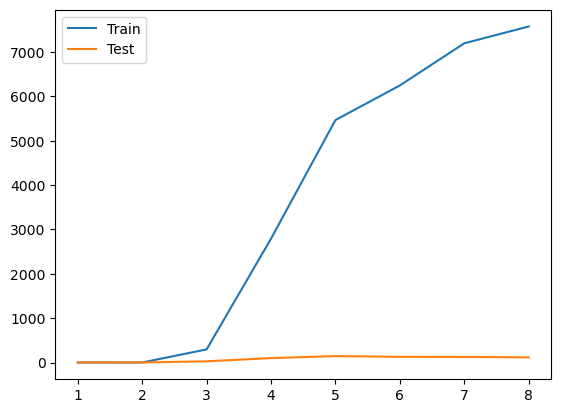

In [7]:
degrees = np.linspace(1,8,8)
print(degrees)
print(train_rmse_errors)
print(test_rmse_errors)
plt.plot(degrees,train_rmse_errors,label='Train')
plt.plot(degrees,test_rmse_errors,label='Test')
plt.legend()
plt.show()

In [8]:
poly_converter = PolynomialFeatures(degree=1,include_bias=False)
poly_features = poly_converter.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(poly_features,y,test_size=0.3,random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
test_predictions = model.predict(X_test)

MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RSME = np.sqrt(MSE)

MAE_percentage = MAE*100/y.mean()
RSME_percntage = RSME*100/y.mean()

print(f"MAE: {MAE} is {MAE_percentage}\nMSE: {MSE}\nRSME: {RSME} is {RSME_percntage}")
poly_features

MAE: 0.6582888489882376 is 0.47337357361662286
MSE: 1.138302786984465
RSME: 1.0669127363493536 is 0.767213808222669


array([[4.62400017e+01, 4.56199989e+01, 4.59599991e+01, 2.97196000e+07,
        4.67833328e+01],
       [4.63800011e+01, 4.54099998e+01, 4.62200012e+01, 3.27508000e+07,
        4.63833338e+01],
       [4.62799988e+01, 4.51699982e+01, 4.53100014e+01, 3.56953000e+07,
        4.58300006e+01],
       ...,
       [2.67049988e+02, 2.60660004e+02, 2.66670013e+02, 2.27671000e+07,
        2.70533335e+02],
       [2.67109985e+02, 2.61329987e+02, 2.65390015e+02, 2.47918000e+07,
        2.65970011e+02],
       [2.60890015e+02, 2.55410004e+02, 2.58869995e+02, 2.32634000e+07,
        2.63643341e+02]])

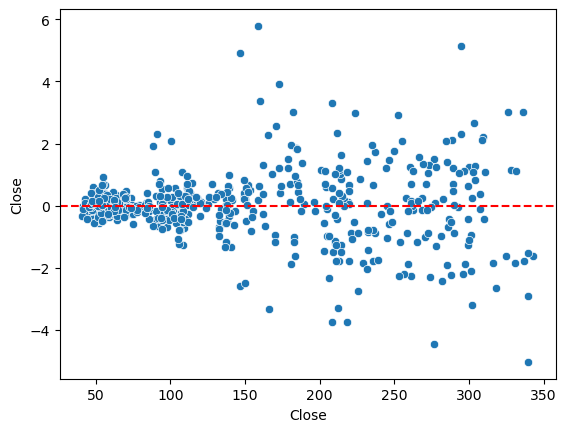

In [9]:
test_residuals = y_test - test_predictions
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='r',ls='--')
plt.show()

# The model is successfull to some point, mostly on the lower values


# Standardiztion

In [10]:
from sklearn.preprocessing import StandardScaler
poly_converter = PolynomialFeatures(degree=1,include_bias=False)
poly_features = poly_converter.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(poly_features,y,test_size=0.3,random_state=42)
scalar_X = StandardScaler()
scalar_X.fit(X_train)

scalar_X_train = scalar_X.transform(X_train)
scalar_X_test = scalar_X.transform(X_test)

In [11]:
from sklearn.linear_model import RidgeCV
ridgeCV_model = RidgeCV(alphas=(0.1,3.0,15.0),scoring='neg_mean_absolute_error')
ridgeCV_model.fit(scalar_X_train,y_train)
test_predictions = ridgeCV_model.predict(scalar_X_test)
ridgeCV_model.alpha_

0.1

In [12]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RSME = np.sqrt(MSE)

MAE_percent = MAE*100/y.mean()
RSME_percent = RSME*100/y.mean()

print(f"MAE: {MAE} percentage: {MAE_percent}'\nMSE: {MSE}\nRSME: {RSME}, percentage: {RSME_percntage}")

MAE: 0.7699484234816606 percentage: 0.5536676449619019'
MSE: 1.5750330259487917
RSME: 1.2550031975850866, percentage: 0.767213808222669


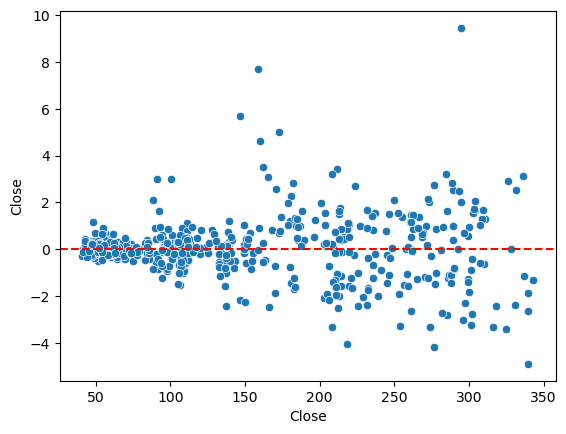

In [13]:
test_residuals = y_test - test_predictions
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='r',ls='--')
plt.show()

In [14]:
from sklearn.linear_model import Ridge
final_poly_converter = PolynomialFeatures(degree=1,include_bias=False)
final_poly_converter.fit(X)
final_features = final_poly_converter.transform(X)
ridge_model = Ridge(alpha=0.1)
scalar = StandardScaler()
scalar.fit(X_train)
scaled_X = scalar.transform(final_features)
ridge_model.fit(scaled_X,y)
predictions = ridge_model.predict(scaled_X)
print(predictions)
print(y)
ridge_model.coef_

[ 45.93370534  45.78895518  45.88569461 ... 262.86967841 263.9391005
 257.94725527]
2        45.959999
3        45.480000
4        46.240002
5        46.389999
6        45.919998
           ...    
1920    268.089996
1921    265.230011
1922    262.970001
1923    261.470001
1924    260.399994
Name: Close, Length: 1923, dtype: float64


array([ 6.23567332e+01,  6.07638236e+01, -3.22640811e+01, -5.30638482e-02,
       -2.07064031e+00])

In [15]:
from joblib import dump,load
dump(final_poly_converter,'models/poly_microsoft.joblib')
dump(scalar,'models/scalar_microsoft.joblib')
dump(ridge_model,'models/ridge_microsoft.joblib')

['models/ridge_microsoft.joblib']

In [16]:
loaded_converter = load('models/poly_microsoft.joblib')
loaded_scalar = load('models/scalar_microsoft.joblib')
loaded_model = load('models/ridge_microsoft.joblib')

In [17]:
new_data = pd.DataFrame({'High':[50,60,70,80,90,100,110,255.00,265.00,250.00],'Low':[45,55,65,75,85,95,105,249.50,259.50,244.50]
                        ,'Open':[52.5,62.5,72,5,82.5,92.5,102.5,250.00,260.00,245.00],'Volume':[10000000,11000000,12000000,130000000,14000000,150000000,16000000,23000000,21500000,22000000]})
new_data['Moving Avg'] = new_data['Open'].rolling(window=3).mean()
new_data = new_data.drop([0,1],axis=0)
print(new_data)
loaded_converter = load('models/poly_microsoft.joblib')
poly_data = loaded_converter.transform(new_data)
print(poly_data)
scaled_new_data = loaded_scalar.transform(poly_data)
predictions = loaded_model.predict(scaled_new_data)
print(loaded_model.coef_)
predictions

    High    Low   Open     Volume  Moving Avg
2   70.0   65.0   72.0   12000000   62.333333
3   80.0   75.0    5.0  130000000   46.500000
4   90.0   85.0   82.5   14000000   53.166667
5  100.0   95.0   92.5  150000000   60.000000
6  110.0  105.0  102.5   16000000   92.500000
7  255.0  249.5  250.0   23000000  148.333333
8  265.0  259.5  260.0   21500000  204.166667
9  250.0  244.5  245.0   22000000  251.666667
[[7.00000000e+01 6.50000000e+01 7.20000000e+01 1.20000000e+07
  6.23333333e+01]
 [8.00000000e+01 7.50000000e+01 5.00000000e+00 1.30000000e+08
  4.65000000e+01]
 [9.00000000e+01 8.50000000e+01 8.25000000e+01 1.40000000e+07
  5.31666667e+01]
 [1.00000000e+02 9.50000000e+01 9.25000000e+01 1.50000000e+08
  6.00000000e+01]
 [1.10000000e+02 1.05000000e+02 1.02500000e+02 1.60000000e+07
  9.25000000e+01]
 [2.55000000e+02 2.49500000e+02 2.50000000e+02 2.30000000e+07
  1.48333333e+02]
 [2.65000000e+02 2.59500000e+02 2.60000000e+02 2.15000000e+07
  2.04166667e+02]
 [2.50000000e+02 2.4450000

array([ 66.10536172, 104.24524577,  90.24173377,  99.80469873,
       109.79453336, 255.67669784, 264.61880799, 248.15016144])